# Import Libraries

In [18]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
import re
import imageio
import pandas as pd

# Development or AWS switch

In [2]:
usingAWS = False

# Assign Data Directories
if usingAWS == True:
    # AWS directory
    train_directory = '../simpsons_train_scaled'
    test_directory = '../simpsons_test_scaled'
else:
    # Local directory
    train_directory = '/media/sf_Gee_Hard_Drive/Kaggle Data/the-simpsons-characters-dataset/simpsons_train_scaled'
    test_directory = '/media/sf_Gee_Hard_Drive/Kaggle Data/the-simpsons-characters-dataset/simpsons_test_scaled'

# Get Train Images & Assign Id

In [3]:
classes = os.listdir(train_directory)
class_indices = np.arange(len(classes))
class_dict = dict(zip(classes, class_indices))
class_dict

{'abraham_grampa_simpson': 0,
 'agnes_skinner': 1,
 'apu_nahasapeemapetilon': 2,
 'barney_gumble': 3,
 'bart_simpson': 4,
 'bumblebee_man': 5,
 'carl_carlson': 6,
 'charles_montgomery_burns': 7,
 'chief_wiggum': 8,
 'cletus_spuckler': 9,
 'comic_book_guy': 10,
 'disco_stu': 11,
 'edna_krabappel': 12,
 'fat_tony': 13,
 'gil': 14,
 'groundskeeper_willie': 15,
 'hans_moleman': 16,
 'helen_lovejoy': 17,
 'homer_simpson': 18,
 'jasper_beardly': 19,
 'jimbo_jones': 20,
 'kent_brockman': 21,
 'krusty_the_clown': 22,
 'lenny_leonard': 23,
 'lionel_hutz': 24,
 'lisa_simpson': 25,
 'maggie_simpson': 26,
 'marge_simpson': 27,
 'martin_prince': 28,
 'mayor_quimby': 29,
 'milhouse_van_houten': 30,
 'miss_hoover': 31,
 'moe_szyslak': 32,
 'ned_flanders': 33,
 'nelson_muntz': 34,
 'otto_mann': 35,
 'patty_bouvier': 36,
 'principal_skinner': 37,
 'professor_john_frink': 38,
 'rainier_wolfcastle': 39,
 'ralph_wiggum': 40,
 'selma_bouvier': 41,
 'sideshow_bob': 42,
 'sideshow_mel': 43,
 'snake_jailbird'

In [4]:
totalClasses = 3
totalPicsPerClass = 3

def getDirs(main):
    classes = os.listdir(main)[0:totalClasses]
    combo = []
    [combo.append([class_dict[clas], clas, main + '/' + clas]) for clas in classes]
    return(combo)

def getPics(directory):
    pics = os.listdir(directory)[0:totalPicsPerClass]
    picPath = [directory + '/' + pic for pic in pics]
    return(picPath)

def readImage(imagePath):
    pix = imageio.imread(imagePath)
    return(pix)

imageDirs = getDirs(train_directory)
s = list(map(lambda x: [x[0], x[1], getPics(x[2])], imageDirs))

trainPix = []
for arr in s:
    for picArray in arr[2]:
        pix = readImage(picArray)
        trainPix.append([arr[0], arr[1], pix])

In [5]:
len(trainPix)

9

# Print out the first 10 pics

/home/gclarkjr5/tensorflow/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


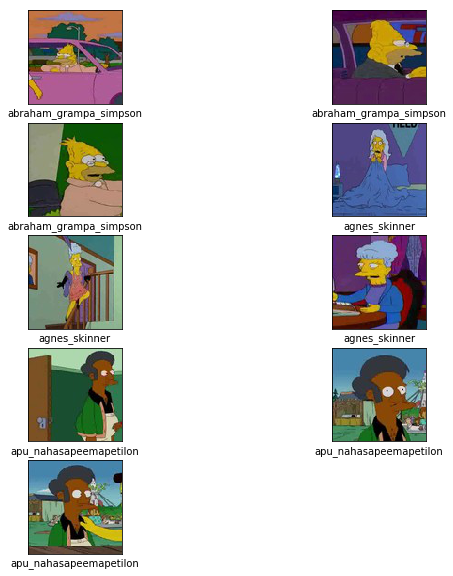

In [6]:
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(len(trainPix[0:10])):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(trainPix[i][2], cmap=plt.cm.binary)
    plt.xlabel(trainPix[i][1])

# PreProcess RGB values from 0 to 1

In [20]:
labels = list(map(lambda x: x[0], trainPix))
names = list(map(lambda x: x[1], trainPix))
images = list(map(lambda x: x[2], trainPix))
preProcessedImages = list(map(lambda x: x/255, images))

In [22]:
labels = np.array(labels)
names = np.array(names)
images = np.array(images)
preProcessedImages = np.array(preProcessedImages)
labels.shape, images.shape, preProcessedImages.shape
names

array(['abraham_grampa_simpson', 'abraham_grampa_simpson',
       'abraham_grampa_simpson', 'agnes_skinner', 'agnes_skinner',
       'agnes_skinner', 'apu_nahasapeemapetilon',
       'apu_nahasapeemapetilon', 'apu_nahasapeemapetilon'], dtype='<U22')

# Variation of groups within Train Images

In [40]:
trainDF = pd.DataFrame(names, columns=["characters"])
grp = trainDF.groupby("characters").agg({"characters":"count"})
percents = grp.groupby(level=0).apply(lambda x: 100 * x / len(trainDF))
percents

,characters
characters,
abraham_grampa_simpson,33.333333
agnes_skinner,33.333333
apu_nahasapeemapetilon,33.333333


# Model Construction

## Model Layers

In [9]:
model_classes = len(classes)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(100, 100, 3)),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(model_classes, activation=tf.nn.softmax)
])

## Model Functions (optimzer, accuracy)

In [10]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit Model to training data

In [11]:
model.fit(preProcessedImages, labels, epochs=10)

Epoch 1/10
9/9 [==============================] - 0s 35ms/step - loss: 3.8011 - acc: 0.0000e+00
Epoch 2/10
9/9 [==============================] - 0s 3ms/step - loss: 4.3138 - acc: 0.0000e+00
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 2.0608 - acc: 0.1111
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 1.2275 - acc: 0.5556
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 1.3901 - acc: 0.3333
Epoch 6/10
9/9 [==============================] - 0s 7ms/step - loss: 0.8299 - acc: 0.6667
Epoch 7/10
9/9 [==============================] - 0s 5ms/step - loss: 0.7186 - acc: 0.7778
Epoch 8/10
9/9 [==============================] - 0s 4ms/step - loss: 0.2378 - acc: 0.8889
Epoch 9/10
9/9 [==============================] - 0s 6ms/step - loss: 0.2219 - acc: 0.8889
Epoch 10/10
9/9 [==============================] - 0s 4ms/step - loss: 0.3888 - acc: 0.7778


# Evaluate Accuracy w/ Test Set

In [12]:
# Get all test images into a similar format given the one directory they are all in
test_pics = os.listdir(test_directory)

def getClass(pic):
    if pic != '.DS_Store':
        character = re.sub('_[0-9]{1,2}.jpg$', '', pic)
        return(character)

classes = list(map(lambda x: x[1], trainPix))
classes = np.array(classes)
uClasses = np.unique(classes)
    
test = []
for pic in test_pics:
    if pic != '.DS_Store':
        path = test_directory + '/' + pic
        pix_array = imageio.imread(path)
        character_label = getClass(pic)
        if character_label == uClasses[0] or character_label == uClasses[1] or character_label == uClasses[2]:
            test.append([class_dict[character_label], character_label, pix_array])

In [13]:
len(uClasses), len(np.unique(np.array(list(map(lambda x: x[1], test)))))

(3, 2)

In [14]:
test_images = list(map(lambda x: x[2], test))
test_images = np.array(test_images)

ppTest_images = list(map(lambda x: x/255, test_images))
ppTest_images = np.array(ppTest_images)

test_labels = list(map(lambda x: x[0], test))
test_labels = np.array(test_labels)

test_names = list(map(lambda x: x[1], test))
test_names = np.array(test_names)

test_labels.shape, test_images.shape, test_names.shape

((98,), (98, 100, 100, 3), (98,))

In [15]:
test_loss, test_acc = model.evaluate(ppTest_images, test_labels)

print('Test accuracy:', test_acc)

98/98 [==============================] - 0s 2ms/step
Test accuracy: 0.10204081632653061


In [16]:
predictions = model.predict(test_images)

preds = [np.argmax(pred) for pred in predictions]

def findLabel(index):
    for key, val in class_dict.items():
        if val == index:
            return(key)
            
pred_labels = [findLabel(pred) for pred in preds]
pred_labels = np.array(pred_labels)

98

/home/gclarkjr5/tensorflow/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


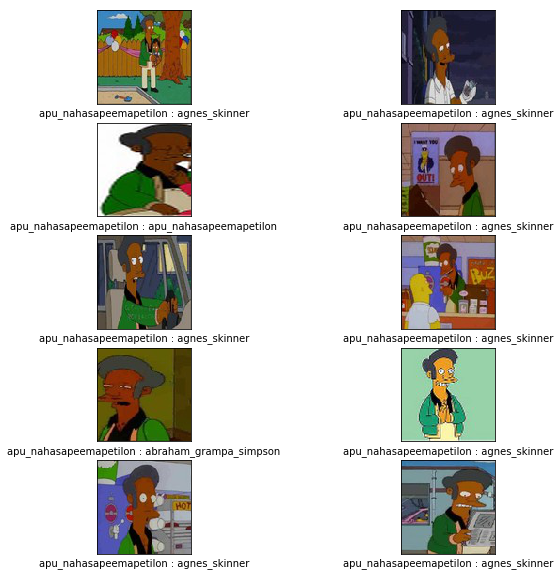

In [17]:
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(len(test_images[0:10])):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i+70], cmap=plt.cm.binary)
    plt.xlabel(test_names[i+70] + " : " + pred_labels[i+70])

# Prediction Stats

In [57]:
d = {'testLabels': test_names, 'predictions': pred_labels}
predDF = pd.DataFrame(data=d)
predDF['pred'] = predDF.apply(lambda x: x[0] == x[1], axis=1)
predDF.groupby(['testLabels']).agg({'pred': 'mean'})

,pred
testLabels,
abraham_grampa_simpson,0.104167
apu_nahasapeemapetilon,0.100000
